### Startup Success Prediction ###


**About Dataset**

Context:
A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. 

Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. 

Some startups become unicorns: privately held startup companies valued at over US$1 billion.

**The objective**

 Build a model to predict the success or outcome of startups based on the available dataset, and you don't want to limit the predictions to startups already present in the dataset

**About the Data**

The data contains industry trends, investment insights and individual company information. There are 48 columns/features. Some of the features are:

- age_first_funding_year – quantitative
- age_last_funding_year – quantitative
- relationships – quantitative
- funding_rounds – quantitative
- funding_total_usd – quantitative
- milestones – quantitative
- age_first_milestone_year – quantitative
- age_last_milestone_year – quantitative
- state – categorical
- industry_type – categorical
- has_VC – categorical
- has_angel – categorical
- has_roundA – categorical
- has_roundB – categorical
- has_roundC – categorical
- has_roundD – categorical
- avg_participants – quantitative
- is_top500 – categorical
- status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed) 

These variables are likely binary indicators (0 or 1) provide information about the startup's funding history, specifically whether it has received funding from angel investors and whether it has successfully completed funding rounds at different stages (A, B, C, D). They can be valuable features in predicting the success or failure of a startup, as funding rounds and investment from angels are often associated with the growth and potential success of a company.
Notes: Each funding round represents a different stage of investment, and startups may not follow a strict sequential order (A, B, C, D). The order can vary based on the business's specific circumstances and the preferences of investors.

##### 1. Import the necessary libraires

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

##### 2. Loading the database

In [2]:
#Make sure you're aware of the current working directory in your Jupyter notebook.
import os
print(os.getcwd())

/Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook


In [3]:
# Assuming this notebook is in the 'notebook' directory
notebook_directory = '/Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook'

In [4]:
# Construct the full file path from the notebook directory
file_path = os.path.join(notebook_directory, '..', 'data', 'startup.csv')

#### 2. Read the data

In [5]:
# It's time to read in our training and testing data using pd.read_csv, 
#and take a first look using the describe() function.
data = pd.read_csv(file_path, encoding="ISO-8859-1")

##### 3. Data Exploration

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [7]:
len(data)

923

##### 3.2 Selecting only the relevant features #####

0. **Unnamed: 0** : <span style="color:red">Irrelevant</span>
1. **state_code** : <span style="color:blue">Create binary columns with all the states, then drop it.</span>
2. **latitude** : <span style="color:red">Irrelevant</span>
3. **longitude** : <span style="color:red">Irrelevant</span>
4. **zip_code** : <span style="color:red">Irrelevant</span>
5. **id** : <span style="color:red">Irrelevant</span>
6. **city** : <span style="color:blue">Create binary columns with all the states, then drop it.</span>
7. **Unnamed: 6** : <span style="color:red">Irrelevant</span>
8. **name** : <span style="color:red">Irrelevant</span>
9. **labels** : <span style="color:red">Irrelevant</span> - A numerical representation of the same information as 'status', drop it to avoid redundancy and potential confusion.
10. **founded_at** : <span style="color:green">Relevant</span> - Allows you to calculate the age of the startup, which can be an important feature.
11. **closed_at** : <span style="color:green">Relevant</span> - Provides direct information about whether a startup has closed or not.
12. **first_funding_at** : <span style="color:green">Relevant</span>
13. **last_funding_at** : <span style="color:green">Relevant</span>
14. **age_first_funding_year** : <span style="color:green">Relevant</span>
15. **age_last_funding_year** : <span style="color:green">Relevant</span>
16. **age_first_milestone_year** : <span style="color:green">Relevant</span>
17. **age_last_milestone_year** : <span style="color:green">Relevant</span>
18. **relationships** : <span style="color:green">Relevant</span> - Represents the number of relationships a startup has.
19. **funding_rounds** : <span style="color:green">Relevant</span> - The number of funding rounds can be crucial, indicative of a startup's financial stability.
20. **funding_total_usd** : <span style="color:green">Relevant</span> - A crucial financial indicator providing valuable insights into a startup's financial health and success.
21. **milestones** : <span style="color:green">Relevant</span> - Can be a relevant feature in predicting startup success, reflecting operational effectiveness, progress toward goals, and market. Experiment with incorporating this column into your predictive model and assess its impact on model performance.
22. **state_code.1** : <span style="color:red">Irrelevant</span>, repeating information with state_code.
23. **is_CA** 
24. **is_NY** 
25. **is_MA** 
26. **is_TX** 
27. **is_otherstate** :  <span style="color:red">Irrelevant</span>
28. **category_code** :  : <span style="color:blue">Create binary columns with all the categories, then drop it.</span>
29. **is_software** 
30. **is_web**  
31. **is_mobile**  
32. **is_enterprise** 
33. **is_advertising** 
34. **is_gamesvideo**  
35. **is_ecommerce**  
36. **is_biotech** 
37. **is_consulting** 
38. **is_othercategory** : <span style="color:red">Irrelevant</span>
39. **object_id** : <span style="color:red">Irrelevant</span>
40. **has_VC** : <span style="color:green">Relevant</span>
41. **has_angel** : <span style="color:green">Relevant</span>
42. **has_roundA** : <span style="color:green">Relevant</span>
43. **has_roundB** : <span style="color:green">Relevant</span>
44. **has_roundC** : <span style="color:green">Relevant</span>
45. **has_roundD** : <span style="color:green">Relevant</span>
46. **avg_participants** : Depends on its importance in predicting startup success and its correlation with the target variable.
47. **is_top500** : Depends on its relevance, importance, interpretability, and correlation with the target variable.
48. **status** : <span style="color:green">Relevant</span>

##### 3.5 Explore missing values 

In [8]:
x= data.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
Unnamed: 0                    0
is_biotech                    0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_othercategory              0
is_consulting                 0
is_otherstate                 0
object_id                     0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
category_code                 0
is_NY                         0
is_TX                         0
first_funding_at              0
latitude                      0
longitud

In [9]:
# Assuming 'data' is your DataFrame
null = pd.DataFrame(data.isnull().sum(), columns=["Null Values"])
null["% Missing Values"] = (data.isna().sum() / len(data) * 100)
null = null[null["% Missing Values"] > 0]
styled_null = (
    null.style
    .background_gradient(cmap='viridis', low=0.2, high=0.1)
)
styled_null

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


#### 3. Preprocessing

##### 3.1  Data Cleaning ####

Target Variable 

In [10]:
data['status'].value_counts()
#In a binary classification problem like predicting whether a startup 
#will be "acquired" or "closed," a balanced dataset typically means that you have a roughly equal 
#number of examples for each class. In your case, you have 597 examples of "acquired" and 326 examples of "closed."

status
acquired    597
closed      326
Name: count, dtype: int64

 Tranforming status(target variable) from categorical to numerical values 

In [11]:
data['status'] = data.status.map({'acquired':1, 'closed':0})
data.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,c:22898,0,0,0,1,0,0,3.0000,1,0
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,c:16191,1,0,1,1,0,0,1.6667,1,1
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,...,c:5192,0,0,1,1,0,1,3.5000,1,1
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,...,c:1043,1,0,1,0,0,1,4.0000,1,1
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,...,c:498,1,1,1,0,0,0,1.0000,1,1


 Remove or impute incorrect or inconsistent data.

 Drop the irrelevant features from 48 columns.

In [12]:
clean_data = data.drop(['Unnamed: 0','latitude','longitude','zip_code','id','Unnamed: 6','name','labels','state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','object_id'], axis=1).copy()
clean_data

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,...,advertising,0,0,1,0,0,0,6.0000,1,1
919,MA,Burlington,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,...,security,1,0,0,1,0,0,2.6667,1,0
920,CA,Sunnyvale,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,...,biotech,0,0,0,0,0,1,8.0000,1,0
921,CA,San Francisco,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,...,software,0,0,1,1,0,0,1.0000,1,1


In [13]:
num_columns = len(clean_data.columns)
print(f"After dropping irrelevant features The DataFrame has {num_columns} columns.")

After dropping irrelevant features The DataFrame has 24 columns.


Handle Missing Values of 2 variables 

In [14]:
#Before we had 5 columns with missing values, 3 of them were irrelevant(Unnamed: 6, state_code.1, closed_at) so 
#we dropped them now we need to input data to only 2 differents variables.

# 1. age_first_milestone_year
# 2. age_last_milestone_year 

# 2. Impute missing values with 0 to 'age_first_milestone_year'
clean_data['age_first_milestone_year'].fillna(0, inplace=True)

# 3. Impute missing values with 0 to 'age_last_milestone_year'
clean_data['age_last_milestone_year'].fillna(0, inplace=True)

In [15]:
print(clean_data.dtypes)

state_code                   object
city                         object
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
category_code                object
has_VC                        int64
has_angel                     int64
has_roundA                    int64
has_roundB                    int64
has_roundC                    int64
has_roundD                    int64
avg_participants            float64
is_top500                     int64
status                        int64
dtype: object


In [16]:
numerical_features = clean_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = clean_data.select_dtypes(include=['object']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['status']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (17):
['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']

Categorical Features (7):
['state_code', 'city', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'category_code']

Target Variable (1):
['status']


In [17]:
# Assuming your_data_df is your main DataFrame
data_df = clean_data

# List of your categorical columns
categorical_columns =  data_df.select_dtypes(include=['object']).columns

# Loop through each categorical column and display a subset of unique values
for categorical_column in categorical_columns:
    unique_values = data_df[categorical_column].unique()
    
    print(f"\nColumn: {categorical_column}")
    print("Unique Values (Subset):")
    print(unique_values[:100]) 


Column: state_code
Unique Values (Subset):
['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' 'AZ' 'ID' 'AR' 'WI']

Column: city
Unique Values (Subset):
['San Diego' 'Los Gatos' 'Cupertino' 'San Francisco' 'Mountain View'
 'San Rafael' 'Williamstown' 'Palo Alto' 'Menlo Park' 'Louisville'
 'Brooklyn' 'Denver' 'Vienna' 'Los Altos' 'Burlingame' 'New York' 'Austin'
 'Seattle' 'Boulder' 'Chicago' 'Berkeley' 'Santa Ana' 'Moffett Field'
 'Durham' 'Pittsburgh' 'San Jose' 'Atlanta' 'Manchester' 'Sunnyvale'
 'Cambridge' 'San Mateo' 'South San Francisco' 'Boston' 'Waltham'
 'Aliso Viejo' 'Kansas City' 'Wilmington' 'Kirkland' 'Tampa' 'Alameda'
 'Bothell' 'Dallas' 'Fremont' 'Santa Clara' 'Princeton' 'Loveland'
 'Kearneysville' 'Los Angeles' 'Canton' 'Bellevue' 'Washington' 'Somerset'
 'Alpharetta' 'Charlottesville' 'Dulles' 'Bloomfield' 'Santa Monica'
 'Milpitas' 'Raleigh' 'Somerville' 'Redwo

Converting Datetime to Numerical values

- these variables : 'founded_at','closed_at', 'first_funding_at', 'last_funding_at'

In [18]:
import pandas as pd

# Assuming your_data_df is your main DataFrame
data_df = clean_data

# List of date columns
date_columns = ['founded_at','closed_at', 'first_funding_at', 'last_funding_at']

# Convert date columns to datetime
for date_column in date_columns:
    data_df[date_column] = pd.to_datetime(data_df[date_column], errors='coerce')

# Convert datetime to timestamp (numerical)
for date_column in date_columns:
    data_df[date_column] = data_df[date_column].astype(int)


Total Numerical Variables 

In [19]:

# Assuming your_data_df is your main DataFrame
data_df = clean_data

# List of your categorical columns
numerical_columns = data_df.select_dtypes(include=['number']).columns

# Loop through each categorical column and display a subset of unique values
for numerical_columns in numerical_columns:
    unique_values = data_df[numerical_columns].unique()
    
    print(f"\nColumn: {numerical_columns}")
    print("Unique Values (Subset):")
    print(unique_values[:10]) 


Column: founded_at
Unique Values (Subset):
[1167609600000000000  946684800000000000 1237334400000000000
 1009843200000000000 1280620800000000000 1104537600000000000
 1072915200000000000 1117584000000000000  974246400000000000
 1136073600000000000]

Column: closed_at
Unique Values (Subset):
[-9223372036854775808  1349049600000000000  1234656000000000000
  1322784000000000000  1335484800000000000  1269734400000000000
  1348272000000000000  1315612800000000000  1317168000000000000
  1216944000000000000]

Column: first_funding_at
Unique Values (Subset):
[1238544000000000000 1108339200000000000 1269907200000000000
 1108598400000000000 1280620800000000000 1153180800000000000
 1158796800000000000 1124841600000000000 1122940800000000000
 1170288000000000000]

Column: last_funding_at
Unique Values (Subset):
[1262304000000000000 1261958400000000000 1269907200000000000
 1177459200000000000 1333238400000000000 1153180800000000000
 1268870400000000000 1286150400000000000 1360281600000000000
 12653

In [20]:
numerical_features = clean_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = clean_data.select_dtypes(include=['object']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['status']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (21):
['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']

Categorical Features (3):
['state_code', 'city', 'category_code']

Target Variable (1):
['status']


Creating dummys variables for categorical values 

In [21]:
import pandas as pd

# Assuming your dataset is in a DataFrame called 'df'

# List of categorical columns
categorical_columns = ['state_code', 'city', 'category_code']

# Create a function to generate mappings
def create_mapping(column):
    unique_values = clean_data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    clean_data[column] = clean_data[column].map(mapping)

# Print the mappings if needed
for column in categorical_columns:
    print(f"{column} mapping: {create_mapping(column)}")


state_code mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34}
city mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 

In [22]:
print(clean_data.head())

   state_code  city           founded_at            closed_at  \
0           0     0  1167609600000000000 -9223372036854775808   
1           0     1   946684800000000000 -9223372036854775808   
2           0     0  1237334400000000000 -9223372036854775808   
3           0     2  1009843200000000000 -9223372036854775808   
4           0     3  1280620800000000000  1349049600000000000   

      first_funding_at      last_funding_at  age_first_funding_year  \
0  1238544000000000000  1262304000000000000                  2.2493   
1  1108339200000000000  1261958400000000000                  5.1260   
2  1269907200000000000  1269907200000000000                  1.0329   
3  1108598400000000000  1177459200000000000                  3.1315   
4  1280620800000000000  1333238400000000000                  0.0000   

   age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
0                 3.0027                    4.6685                   6.7041   
1                 9.9973

#### 4.  Data Analysis ####

##### 3.1 Analyse frequency of the first feature(state_code) #####

In [23]:
print("States by frequency:")
state_counts = clean_data['state_code'].value_counts().reset_index(name='count')
state_counts['proportion'] = state_counts['count'] / len(clean_data) * 100
state_counts = state_counts.sort_values(by='count', ascending=False)
print(state_counts.to_string(index=False))
#We want to conserv only the top 10 of state_code by doing that I can add the rest to 
#others_categories.

States by frequency:
 state_code  count  proportion
          0    488   52.871073
          3    106   11.484290
          1     83    8.992416
          6     42    4.550379
          7     42    4.550379
          4     19    2.058505
          8     18    1.950163
         10     17    1.841820
          5     13    1.408451
         11     11    1.191766
          9      7    0.758397
         25      7    0.758397
         15      7    0.758397
         20      7    0.758397
         14      6    0.650054
         21      6    0.650054
         23      5    0.541712
         19      4    0.433369
         18      4    0.433369
         22      3    0.325027
         24      3    0.325027
         26      3    0.325027
         17      3    0.325027
         13      2    0.216685
         12      2    0.216685
          2      2    0.216685
         27      2    0.216685
         28      2    0.216685
         30      2    0.216685
         31      2    0.216685
         16      1

##### 3.1 Analyse frequency of the first feature(categories_code) #####

In [24]:
print("Categories by frequency:")
category_counts = clean_data['category_code'].value_counts().reset_index(name='count')
category_counts['proportion'] = category_counts['count'] / len(clean_data) * 100
category_counts = category_counts.sort_values(by='count', ascending=False)
print(category_counts.to_string(index=False))
#We want to conserv only the top 10 of state_code by doing that I can add the rest to 
#others_categories.

Categories by frequency:
 category_code  count  proportion
             3    153   16.576381
             2    144   15.601300
             7     79    8.559047
             1     73    7.908992
            15     62    6.717226
             4     52    5.633803
            23     35    3.791983
             5     34    3.683640
            20     34    3.683640
            13     27    2.925244
            14     25    2.708559
             9     25    2.708559
            21     23    2.491874
            10     19    2.058505
            18     19    2.058505
            24     14    1.516793
            22     12    1.300108
            27     11    1.191766
            11     11    1.191766
            17      8    0.866739
            16      8    0.866739
            30      8    0.866739
            25      7    0.758397
            12      7    0.758397
             0      6    0.650054
             6      6    0.650054
             8      4    0.433369
            19      3  

4.3 Analyzing Data

Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. In this stage, you will find yourself classifying features and determining their correlation with the target variable and each other.

In [25]:
# # Now use 'encoded_data' in the correlation calculation
# data_encoded = data_encoded
# column_names = data_encoded.columns.tolist()
# print(column_names)

In [26]:

# # Now use 'encoded_data' in the correlation calculation
# data_encoded = data_encoded
# column_names = data_encoded.columns.tolist()

# # Identify the column name representing 'status' after one-hot encoding
# status_column_name = [col for col in column_names if 'status' in col.lower()][0]


# # Extracting feature matrix
# feature_matrix = your_data_df[column_names]

# def calculate_correlations(df: pd.DataFrame, target: pd.Series) -> pd.DataFrame:
#     """
#     Calculates the correlations of all columns with regards to the target and returns a DataFrame with all column names
#     and their correlation coefficient with regards to the target.

#     :param df: Pandas DataFrame
#     :param target: Pandas Series with target values
#     :return: Pandas DataFrame with column names and their correlation coefficient with regards to the target
#     """
#     # Calculate correlations
#     correlations = df.corrwith(target)
    
#     # Create a DataFrame with column names and correlation coefficients
#     correlation_df = pd.DataFrame(correlations, columns=['correlation_coefficient'])
    
#     return correlation_df

# # Now you can calculate correlations using the identified 'status' column name
# xcorrelations = calculate_correlations(feature_matrix, encoded_data[status_column_name])

# # Display the correlations
# print(xcorrelations)

2.Detect and address outliers.

Statistical Summary

In [27]:
data_shape = clean_data.shape
print(data_shape)

(923, 24)


#### 5. Data Segmentation

#####  5.1 Define the inputs and the target #####

In [28]:
inputs= clean_data.drop('status', axis=1)  # Input features (exclude 'status' column)
target = clean_data['status']  # Target variable

In [29]:
##This line of code is just to confirm that the colum of target(Purchased)is binary
#from the beggining we could see that were binary because we have Class 0(acquired) and Class 1(closed)
import numpy as np
unique_values = np.unique(target)
if len(unique_values) == 2:
    print("Your target variable is binary.")
else:
    print("Your target variable is not binary.")

Your target variable is binary.


In [30]:
target

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int64

In [31]:
inputs 

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0,0,1167609600000000000,-9223372036854775808,1238544000000000000,1262304000000000000,2.2493,3.0027,4.6685,6.7041,...,3,0,0,1,0,0,0,0,1.0000,0
1,0,1,946684800000000000,-9223372036854775808,1108339200000000000,1261958400000000000,5.1260,9.9973,7.0055,7.0055,...,1,1,1,0,0,1,1,1,4.7500,1
2,0,0,1237334400000000000,-9223372036854775808,1269907200000000000,1269907200000000000,1.0329,1.0329,1.4575,2.2055,...,2,2,0,0,1,0,0,0,4.0000,1
3,0,2,1009843200000000000,-9223372036854775808,1108598400000000000,1177459200000000000,3.1315,5.3151,6.0027,6.0027,...,1,3,0,0,0,1,1,1,3.3333,1
4,0,3,1280620800000000000,1349049600000000000,1280620800000000000,1333238400000000000,0.0000,1.6685,0.0384,0.0384,...,1,4,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0,3,1230768000000000000,-9223372036854775808,1247097600000000000,1247097600000000000,0.5178,0.5178,0.5808,4.5260,...,2,15,0,0,1,0,0,0,6.0000,1
919,1,98,883612800000000000,1214352000000000000,1112313600000000000,1174608000000000000,7.2521,9.2274,6.0027,6.0027,...,1,10,1,0,0,1,0,0,2.6667,1
920,0,28,915148800000000000,1339891200000000000,1183075200000000000,1183075200000000000,8.4959,8.4959,9.0055,9.0055,...,1,20,0,0,0,0,0,1,8.0000,1
921,0,3,1230768000000000000,-9223372036854775808,1254700800000000000,1320105600000000000,0.7589,2.8329,0.7589,3.8356,...,2,3,0,0,1,1,0,0,1.0000,1


In [32]:
print(inputs['state_code'].head(20))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    2
13    3
14    4
15    5
16    0
17    0
18    3
19    0
Name: state_code, dtype: int64


In [33]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

#### 6. Model Training

In [34]:
# Initialize the model as a random forest classifier with 150 trees (default is 100 trees)
def model_training(x_train, x_test, y_train, y_test):
    # Initialize the model as a random forest classifier
    best_model = RandomForestClassifier(n_estimators = 150)
    # Train the model
    best_model.fit(x_train,y_train)
    return x_train, x_test, y_train, y_test, best_model

In [35]:
x_train, x_test, y_train, y_test, best_model_grid = model_training(x_train, x_test, y_train, y_test)

In [36]:
print(x_train.columns)

Index(['state_code', 'city', 'founded_at', 'closed_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'avg_participants', 'is_top500'],
      dtype='object')


#### 7. Model Testing

In [37]:
def model_testing(best_model,x_test,y_test):

    ### 7- Model Prediction and Evaluation.
    y_test_pred = best_model.predict(x_test)

    return best_model,y_test_pred,y_test

In [38]:
best_model_grid,y_test_pred,y_test = model_testing(best_model_grid,x_test,y_test) 

In [39]:
best_model_grid.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 8.  Model Evaluation:


In [40]:
def model_performance(best_model, y_test_pred, y_test):

    ### 8- Model Performance Visualization Confusion of Matrix 
    print("Confusion Matrix:")
    confusion_matrix_display = ConfusionMatrixDisplay.from_predictions(
        y_test, y_test_pred,
        labels = best_model.classes_,
        cmap = 'magma'
    );
    ### 9- Classification Report
    print("Classification Report:")
    report = classification_report(y_test, y_test_pred, target_names = ['acquired', 'closed'])
    print(report)

    return confusion_matrix_display,report, best_model

##### Confusion Matrix and Analysis: ####

Print a classification report

Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

    acquired       0.97      1.00      0.99        73
      closed       1.00      0.98      0.99       112

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



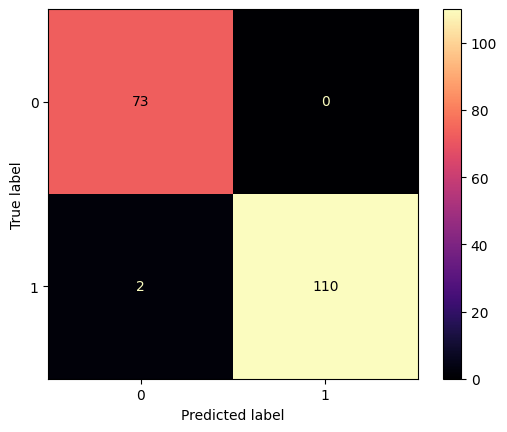

In [41]:
confusion_matrix_display,report, best_model_grid = model_performance(best_model_grid, y_test_pred, y_test)

Interpretation:
- True Positive (TP): 73 instances were correctly predicted as "acquired."
- False Positive (FP): 0 instances were incorrectly predicted as "acquired."
- True Negative (TN): 112 instances were correctly predicted as "closed."
- False Negative (FN): 2 instances were incorrectly predicted as "closed."

In [42]:
#predict_data = 0,2

In [43]:
#best_model.predict(predict_data)

#### 9. Optimizing hyperparameters with SearchGridCV ###

In [44]:
#The GridSearchCV function with 
#cv=5 specifies 5-fold cross-validation (cv stands for the number of folds)

def find_best_parameters(parameter_grid, x_train, y_train):
    # Model instantiation
    model = RandomForestClassifier(random_state=1)

    # GridSearchCV to find the best params for the model
    grid_search = GridSearchCV(model, parameter_grid, scoring='accuracy', cv=5)
    grid_search.fit(x_train, y_train)

    # Best parameters from GridSearchCV
    best_model_grid = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_model_grid, best_params, best_score

In [45]:
parameter_grid = {
    'n_estimators': [10, 100,500],
    'max_features': [2, 4, 6, 10],
}

In [46]:
best_model_grid,best_params,best_score  = find_best_parameters(parameter_grid, x_train, y_train)

In [47]:
print("Best Params:",best_params)
print("Best Accuracy Score for Model:", best_score)
print("Best Model", best_model_grid)

Best Params: {'max_features': 4, 'n_estimators': 100}
Best Accuracy Score for Model: 0.9905313476742048
Best Model RandomForestClassifier(max_features=4, random_state=1)


Evaluate on Test Set

In [50]:
# Obtain the model's predictions on the test dataset
from sklearn.metrics import accuracy_score
test_pred = best_model_grid.predict(x_test)
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9891891891891892


In [51]:
import joblib
file_path = '../data/best_model.joblib'
# Save the entire model
joblib.dump(best_model_grid, file_path)
# Load the entire model
loaded_model = joblib.load(file_path)